In [1]:
# Several things
# I don't use categorical y here, so I use rf$mse in stead of rf$err.rate
# I set seed for the data set (set another seed for test set too!)
# I save the information for all features
# I change the code for selecting important features.
# I change the code for making average for the last row
# I set the number of running time and the number of top features as a parameters
# I plot the final result, you can set the name of the picture as well as x-y axis (important)
# I print Repeat each time to see the where are we now
# If you run the code yourself, you may want to record the running time on your own script.
# I use test data set instead of oob or mse error on training set.

In [2]:
source('simData.R')
library(WGCNA)
library(randomForest)
library(fuzzyforest)
library(dplyr)

Warning message:
"package 'WGCNA' was built under R version 3.6.1"Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: 'fastcluster'

The following object is masked from 'package:stats':

    hclust


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'WGCNA'

The following object is masked from 'package:stats':

    cor

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'fuzzyforest' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# 1. Data

In [3]:
n= 100   #number of patients
T = 5  # number of observations per patient
p = 400 # number of features

set.seed(100)
data <- sim_3(n,T,cor_feature = 0.8) # generate AR data set with random effect (use sim_3() for no RE)
#data <- sim_2(n,T,cor_feature = 0.8) # genearate CS  data set (no random effect)


X = data[,-ncol(data)] # remove y value from for X matrix
y = data[,ncol(data)] # assign target variable

In [4]:
n_test= 30   #number of patients
T = 5  # number of observations per patient
p = 400 # number of features

set.seed(101)
data_test <- sim_3(n_test,T,cor_feature = 0.8) # generate AR data set with random effect (use sim_3() for no RE)
#data <- sim_2(n,T,cor_feature = 0.8) # genearate CS  data set (no random effect)


X_test = data_test[,-ncol(data_test)] # remove y value from for X matrix
y_test = data_test[,ncol(data_test)] # assign target variable

# 2. Random Forest

In [5]:
n_run = 100 # the number of times RF will run on the data set
n_top = 10 # the top n_top variables will be selected

In [6]:
# create empty data frame to save simulation results in
result_rf = matrix(0,n_run+1,400+1) # the last row is for average
result_rf = data.frame(result_rf)
names(result_rf)[401] = "error"
names(result_rf)[1:400] = paste("V",1:400,sep="")
result_rf[1:5,]

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V392,V393,V394,V395,V396,V397,V398,V399,V400,error
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
system.time({
for(Repeat in 1:n_run){
  set.seed(Repeat+34) # change seed each loop

  rf <- randomForest(X,y) # fit random forest
  
  # error on the test set
  preds <- predict(rf, newdata=X_test)
  error = sum((y_test-preds)^2)/(n_test*T)

  
  # this is a quicker way to get the ranking (not juct choosing) of varibales 
  importance_order <- sort(rf$importance, decreasing = TRUE,index.return=TRUE) # sorts features by importance
  top_variables = importance_order$ix[1:n_top] # the ranking
  
  # If variable was selected as important, indicate with 1 (otherwise 0)
  for (i in 1:400){
      result_rf[Repeat,i] <- as.numeric(i %in% top_variables)
  }
  result_rf[Repeat,401] <- error
    
  flush.console()
  cat(Repeat,"\n")
}
})
result_rf[n_run+1,] = colMeans(result_rf[1:n_run,])
write.csv(result_rf,file = 'results_rf.csv')

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100


   user  system elapsed 
1912.45    4.87 1962.22 

In [8]:
# The final result after N_run times
result_rf[n_run+1,]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V392,V393,V394,V395,V396,V397,V398,V399,V400,error
101,1,0.98,1,0,0,0.28,1,0,0,0,...,0,0,0,0,0,0,0,0,0,31.9384


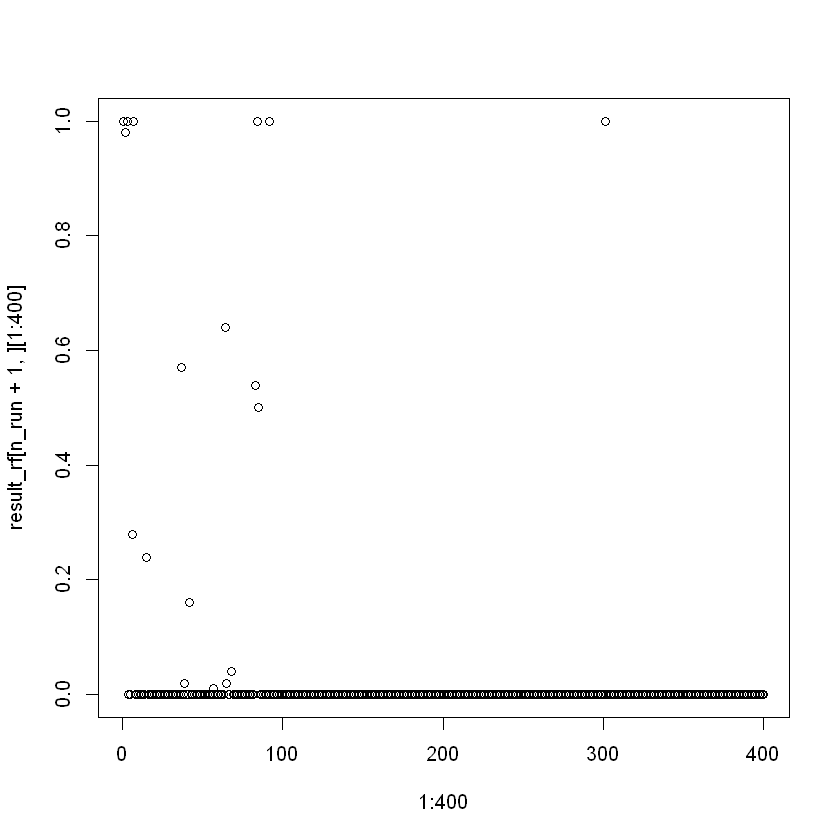

In [9]:
plot(1:400,result_rf[n_run+1,][1:400])

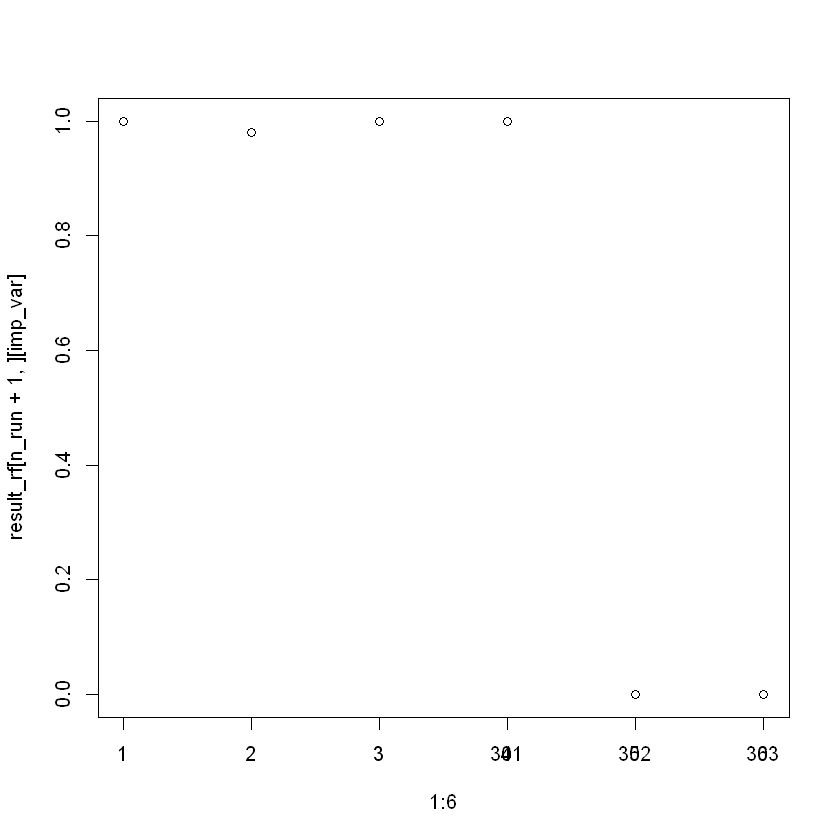

In [10]:
imp_var = c(1,2,3,301,302,303)
plot(1:6,result_rf[n_run+1,][imp_var])
axis(1, at=1:6, labels=imp_var)